In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/global_air_quality_data_10000.csv")
df.head()
df.info()
df.describe()
df.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


Index(['City', 'Country', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity', 'Wind Speed'],
      dtype='object')

In [ ]:
df.isnull().sum()
df.fillna(method='ffill', inplace=True)


<ipython-input-14-65cb30ad4bb3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Fill missing values


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(df.dtypes)
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)

City                   object
Country                object
Date           datetime64[ns]
PM2.5                 float64
PM10                  float64
NO2                   float64
SO2                   float64
CO                    float64
O3                    float64
Temperature           float64
Humidity              float64
Wind Speed            float64
dtype: object
datetime64[ns]


**SAVED CLEANED FILES**

In [ ]:
df.to_csv("cleaned_air_quality.csv", index=False)



VISUALIZATIONS AND INTERPRETION.


**LINE PLOT**

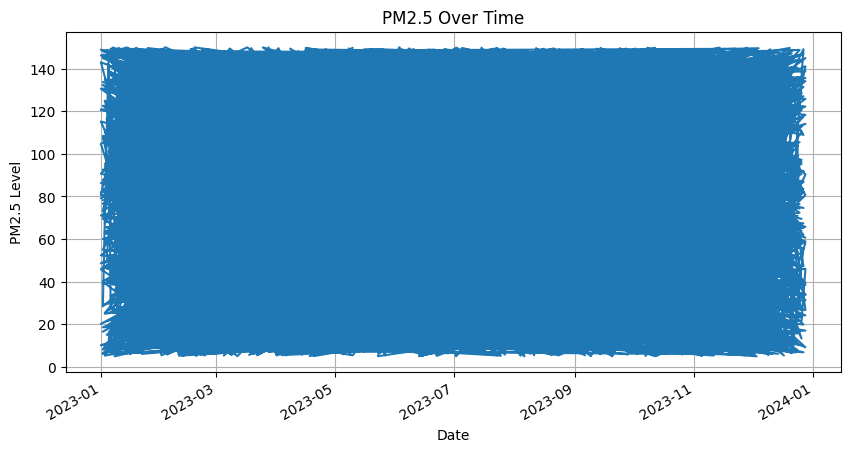

In [ ]:
plt.figure(figsize=(10, 5))
df['PM2.5'].plot()
plt.title('PM2.5 Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.grid(True)
plt.show()

**CORRELATION HEAT MAP**

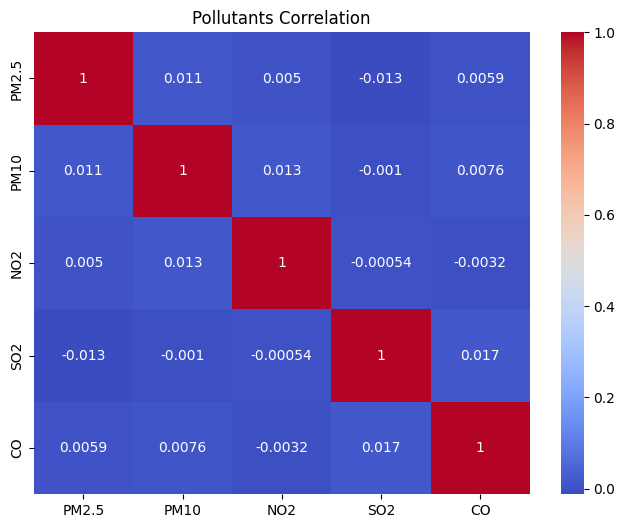

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(df[['PM2.5','PM10','NO2','SO2','CO']].corr(), annot=True, cmap='coolwarm')
plt.title('Pollutants Correlation')
plt.show()

**INTERACTIVE PLOT**

In [ ]:
import plotly.express as px
fig = px.line(df.reset_index(), x='Date', y='PM2.5', color='City', title='PM2.5 Trends by City')
fig.show()

**SCATTER PLOT**

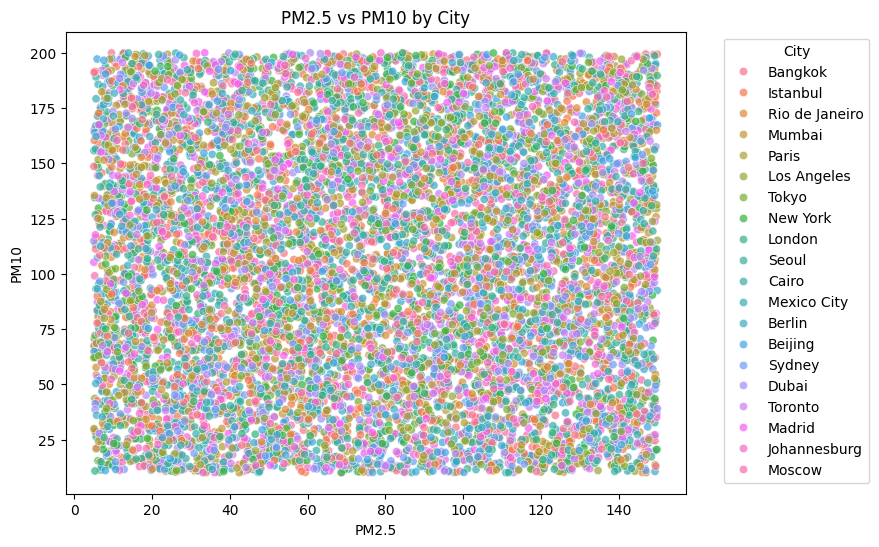

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='PM10', data=df, hue='City', alpha=0.7)
plt.title('PM2.5 vs PM10 by City')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**BOX PLOT**

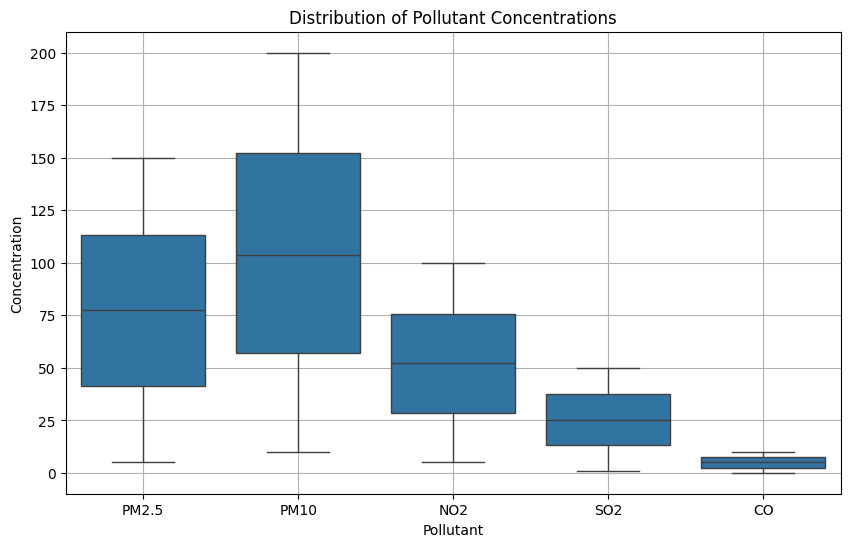

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
df_melted = df[pollutants].melt(var_name='Pollutant', value_name='Concentration')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pollutant', y='Concentration', data=df_melted)
plt.title('Distribution of Pollutant Concentrations')
plt.grid(True)
plt.show()

**BAR GRAPH**

<ipython-input-32-01d8c2c71e7a>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




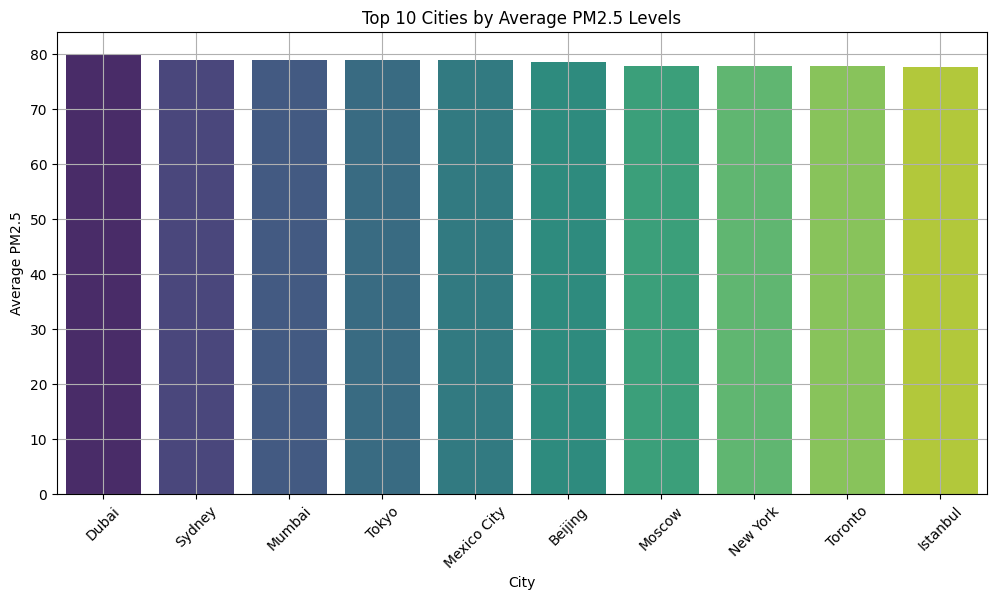

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
avg_pm25 = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_pm25.index, y=avg_pm25.values, palette='viridis')
plt.title('Top 10 Cities by Average PM2.5 Levels')
plt.xlabel('City')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()